This notebook is used to find recording with consecutive 0 or -1

In [1]:
import pandas as pd
import csv
import obspy
import matplotlib.pyplot as plt
import numpy as np
from CheckFunctions import *

In [2]:
#Load the catalogue
jan2005=pd.read_csv('/Volumes/Antennes/Processing/MVOE_catalog200501.csv')
feb2005=pd.read_csv('/Volumes/Antennes/Processing/MVOE_catalog200502.csv')
frames=[jan2005,feb2005]
cat=pd.concat(frames)
cat.reset_index()

,index,datetime,mainclass,subclass,duration,wavfilepath,sampling_rate,npts,traceNum,traceID,sfilepath
0,0,2005-01-01 01:00:15,R,_,71.0,/Volumes/Antennes/data_Montserrat/WAV/MVOE_/20...,100,7100,0,.MBBY.Z.BH,/Volumes/Antennes/data_Montserrat/REA/MVOE_/20...
1,1,2005-01-01 01:00:15,R,_,71.0,/Volumes/Antennes/data_Montserrat/WAV/MVOE_/20...,75,5325,1,.MBGB.Z.BH,/Volumes/Antennes/data_Montserrat/REA/MVOE_/20...
2,2,2005-01-01 01:00:15,R,_,71.0,/Volumes/Antennes/data_Montserrat/WAV/MVOE_/20...,75,5325,2,.MBGH.Z.BH,/Volumes/Antennes/data_Montserrat/REA/MVOE_/20...
3,3,2005-01-01 01:00:15,R,_,71.0,/Volumes/Antennes/data_Montserrat/WAV/MVOE_/20...,100,7100,3,.MBHA.Z.BH,/Volumes/Antennes/data_Montserrat/REA/MVOE_/20...
4,4,2005-01-01 01:00:15,R,_,71.0,/Volumes/Antennes/data_Montserrat/WAV/MVOE_/20...,100,7100,4,.MBLY.Z.BH,/Volumes/Antennes/data_Montserrat/REA/MVOE_/20...
5,5,2005-01-01 01:00:15,R,_,71.0,/Volumes/Antennes/data_Montserrat/WAV/MVOE_/20...,75,5325,5,.MBRV.Z.SH,/Volumes/Antennes/data_Montserrat/REA/MVOE_/20...
6,6,2005-01-01 01:00:15,R,_,71.0,/Volumes/Antennes/data_Montserrat/WAV/MVOE_/20...,225,15975,6,.MBRY.Z.BH,/Volumes/Antennes/data_Montserrat/REA/MVOE_/20...
7,7,2005-01-01 01:00:15,R,_,71.0,/Volumes/Antennes/data_Montserrat/WAV/MVOE_/20...,75,5325,7,.MBWH.Z.SH,/Volumes/Antennes/data_Montserrat/REA/MVOE_/20...
8,8,2005-01-01 01:00:15,R,_,71.0,/Volumes/Antennes/data_Montserrat/WAV/MVOE_/20...,225,15975,8,.MBRY.E.BH,/Volumes/Antennes/data_Montserrat/REA/MVOE_/20...
9,9,2005-01-01 01:00:15,R,_,71.0,/Volumes/Antennes/data_Montserrat/WAV/MVOE_/20...,225,15975,9,.MBRY.N.BH,/Volumes/Antennes/data_Montserrat/REA/MVOE_/20...


ahah


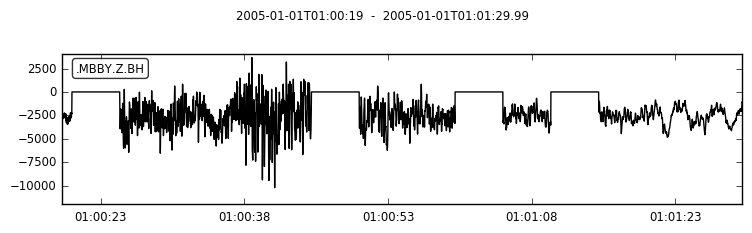

1


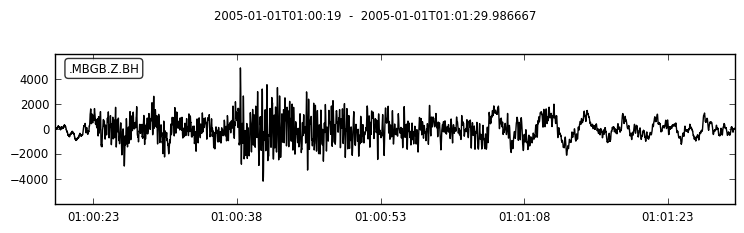

2


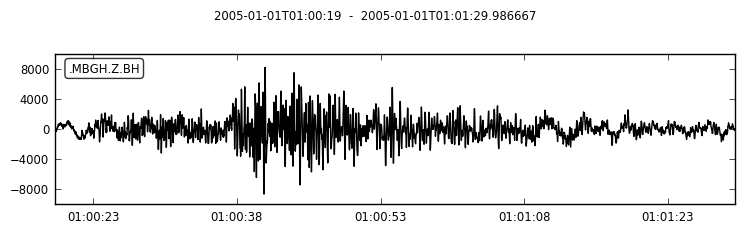

3


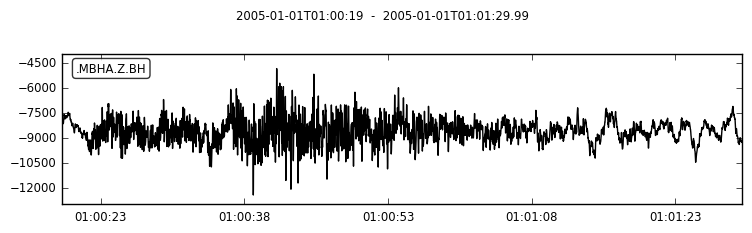

4


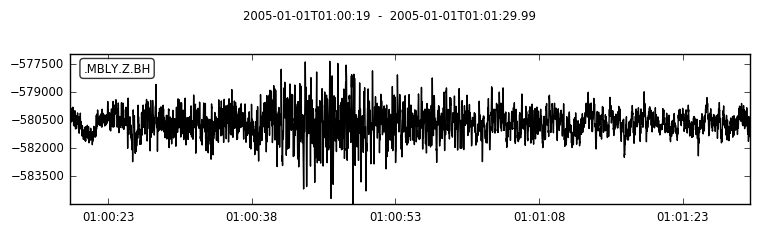

5


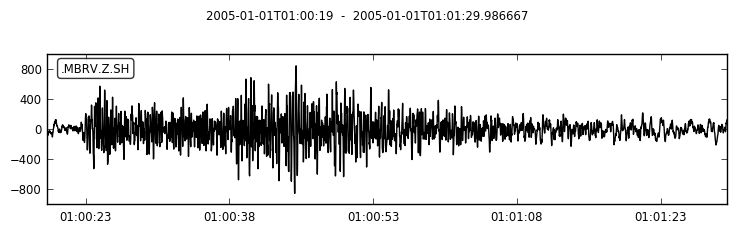

ahah


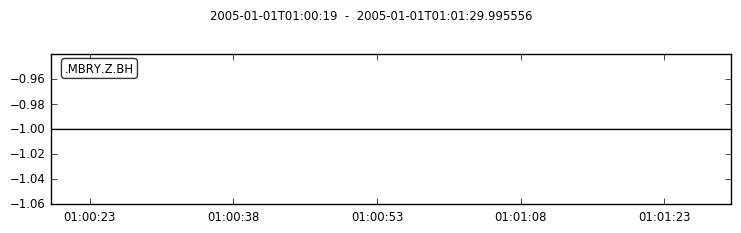

7


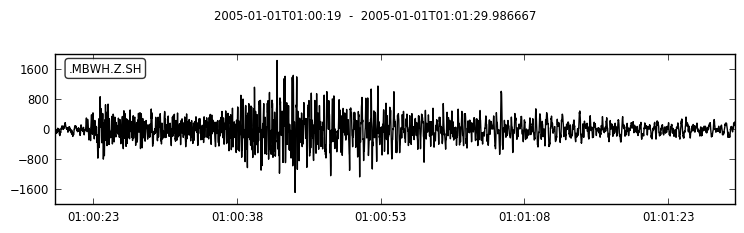

ahah


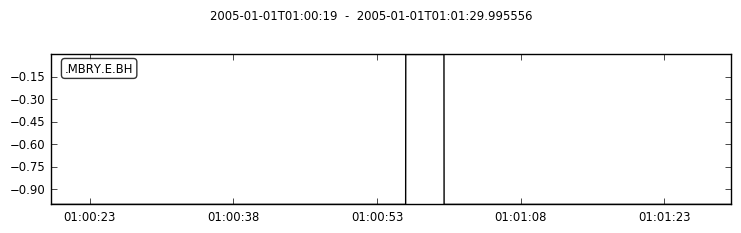

ahah


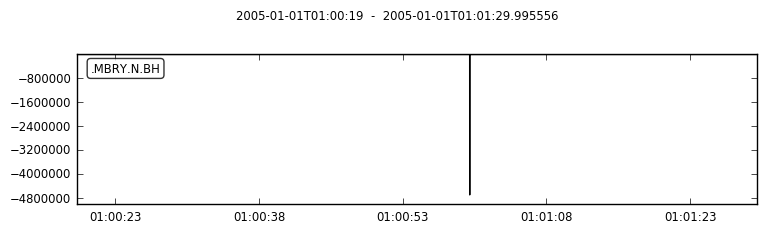

In [7]:
for i in range(10):
    station=cat.iloc[i][" traceID"].split(".")[1]
    location=cat.iloc[i][" traceID"].split(".")[2]
    obspy.read(cat.iloc[i][" wavfilepath"]).select(station=station,location=location)
    #name="/Volumes/Antennes/Processing/figure/testFigure"+str(i)+"png"
    #obspy.read(cat.iloc[i][" wavfilepath"]).select(station=station,location=location).plot(outfile=name)
    #print(station)
    data=obspy.read(cat.iloc[i][" wavfilepath"]).select(station=station,location=location)[0].data
    if check0andMinus1(data):
        print('Good Recording')
        obspy.read(cat.iloc[i][" wavfilepath"]).select(station=station,location=location).plot()
    else:
        print("There is consecutive 0 or -1. in this recording")
        obspy.read(cat.iloc[i][" wavfilepath"]).select(station=station,location=location).plot()



        